# 🏥 Projeto: Previsão de Mortalidade em Pacientes Hospitalares
Este notebook tem como objetivo utilizar dados hospitalares e ambientais para prever a mortalidade dos pacientes durante a internação hospitalar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 📂 Carregamento dos Dados

In [3]:
admissions = pd.read_csv('../data/HDHI Admission data.csv')
mortality = pd.read_csv('../data/HDHI Mortality Data.csv')
pollution = pd.read_csv('../data/HDHI Pollution Data.csv')

## 🧹 Pré-processamento Inicial

In [4]:
# Datas
admissions['D.O.A'] = pd.to_datetime(admissions['D.O.A'], errors='coerce')
mortality['DATE OF BROUGHT DEAD'] = pd.to_datetime(mortality['DATE OF BROUGHT DEAD'], errors='coerce')
pollution['DATE'] = pd.to_datetime(pollution['DATE'], errors='coerce')

# Variável alvo
admissions['MORTALITY'] = admissions['MRD No.'].isin(mortality['MRD']).astype(int)

## 🔍 Análise Exploratória Inicial

MORTALITY
0    15694
1       63
Name: count, dtype: int64


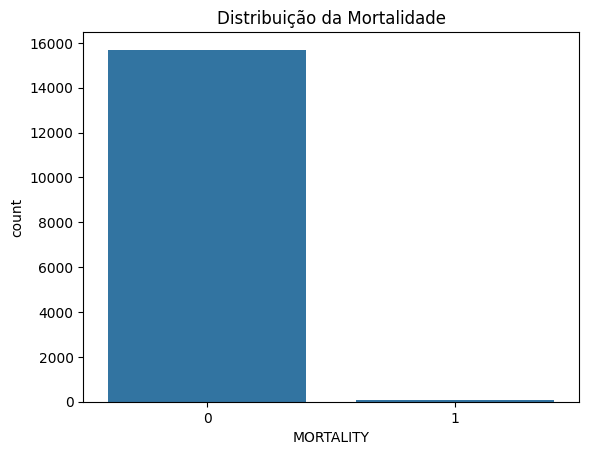

In [5]:
print(admissions['MORTALITY'].value_counts())
sns.countplot(x='MORTALITY', data=admissions)
plt.title('Distribuição da Mortalidade')
plt.show()

## 🧠 Seleção de Variáveis e Preparação dos Dados para o Modelo

In [6]:
# Seleção de colunas numéricas e remoção de colunas irrelevantes
features = admissions.select_dtypes(include=['int64', 'float64'])
features = features.drop(columns=['SNO'])  # Remover ID
X = features.drop('MORTALITY', axis=1)
y = features['MORTALITY']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 🤖 Treinamento do Modelo

In [7]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 📊 Avaliação do Modelo

In [8]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9947123519458545
[[4699    0]
 [  25    4]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4699
           1       1.00      0.14      0.24        29

    accuracy                           0.99      4728
   macro avg       1.00      0.57      0.62      4728
weighted avg       0.99      0.99      0.99      4728

